# Day 2, Session 3, Amir Haji-Akbari

Change directory to the Water-Bulk

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
cd ~/7th_workshop_MD/day_two/session3/Water-Bulk/
</code></pre>
</div>

Systems:
- LJ Bulk
- Water Bulk
    - TIP3P
    - TIP4P
    - TIP4P/2005
    - SPC/E
    
LAMMPS version: 2 august 2023

Water models we will simulate:

- The **SPC/E** (Extended simple point charge) water model is a modification of the original SPC model, incorporating an improved treatment of electrostatic interactions with an additional polarization correction term. This model enhances the accuracy of water's dielectric properties and self-diffusion coefficient. 
> Berendsen, Grigera, Straatsma, J Phys Chem, 91, 6269-6271 (1987)

- The **TIP3P (Three-site transferable intermolecular potential)** water model represents the water molecule with three interaction sites, including charges on the hydrogen and oxygen atoms, and is known for its simplicity and computational efficiency. However, it has limitations in accurately modeling some physical properties of water. 
> Jorgensen, Chandrasekhar, Madura, Impey, Klein, J Chem Phys, 79, 926 (1983)

- The **TIP4P (Four-site transferable intermolecular potential)** water model includes an additional dummy atom carrying a negative charge near the oxygen atom, improving the representation of water's dipole moment and hydrogen bonding compared to TIP3P. This model provides better accuracy for many thermodynamic properties of water. 
> Jorgensen, Chandrasekhar, Madura, Impey, Klein, J Chem Phys, 79, 926 (1983)

- The **TIP4P/2005** water model is an optimized version of TIP4P, designed to improve the accuracy of water properties such as density, diffusion coefficient, and melting point. It adjusts parameters like the oxygen-hydrogen bond length and angle, providing a better fit to experimental data. 
> Abascal, Sanz, Fernandez, Vega, J Chem Phys, 122, 234511 (2005)


# Tutorial: Simulating TIP4P Bulk Water in LAMMPS

## LAMMPS input file
### 1) Initialization
First, we'll initialize LAMMPS and set up the necessary parameters.

**Input file (in.tip4p-generate):**

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
units           real
atom_style      full
dimension       3
boundary        p p p
</code></pre>
</div>

Explanation:

- units real sets units to the real system (e.g., Angstroms for distance, kcal/mol for energy).
- atom_style full is appropriate for molecular systems like water.
- dimension 3 sets the simulation box to three dimensions.
- boundary p p p sets periodic boundary conditions in all three dimensions.

### 2) System Definition
Define the water molecule structure and place them in the simulation box.

**Input file (continuation):**

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
region box block 0 30 0 30 0 30
create_box 2 box  bond/types 1 angle/types 1 &
                extra/bond/per/atom 2 extra/angle/per/atom 1 extra/special/per/atom 2
</code></pre>
</div>


Explanation:

- region defines a simulation region named "box" with dimensions 30x30x30 (distance units).
- create_box creates a simulation box for a system with 2 atom types, 1 bond type, 1 angle type, and specifies additional space for bonds, angles, and special atom interactions.

**Input file (continuation):**

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
mass 1 15.9994
mass 2 1.008

#Define interaction styles
pair_style      lj/cut/tip4p/long 1 2 1 1 0.15 8.0 
pair_coeff      1 1 0.1550 3.1536
pair_coeff      2 2 0.0 1.0
pair_coeff      1 2 0.0 1.0
bond_style      harmonic
bond_coeff      1 450 0.9572      
angle_style     harmonic
angle_coeff     1 55 104.52   

#Create atoms
molecule water tip4p.mol
create_atoms 0 random 400 34564 NULL mol water 25367 overlap 2.0

#Long-range electrostatics
kspace_style    pppm/tip4p 1.0e-4
</code></pre>
</div>

Explanation:

- pair_style lj/cut/tip4p/long specifies the Lennard-Jones potential with long-range Coulombic interactions.
- pair_coeff, bond_style, bond_coeff, angle_style, and angle_coeff define interaction parameters for the TIP4P/Ice model.
- molecule defines a molecule named "water" using the file "tip4p.mol".
- create_atoms randomly creates 400 water molecules in the simulation box, using a random seed of 34564, with molecule ID 25367, ensuring no overlap within a distance of 2.0 units.
- kspace_style pppm/tip4p is used for long-range electrostatics with the Particle-Particle Particle-Mesh (PPPM) for TIP4P water model with an accuracy of 1.0e-4.

### What is the tip4p.mol?

It's a LAMMPS molecule file where you specify the geometry of the molecule you want to create.

**Molecule file (tip4p.mol):**

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
# Water molecule. TIP4P geometry

3 atoms
2 bonds
1 angles

Coords

1    0.00000  -0.06556   0.00000
2    0.75695   0.52032   0.00000
3   -0.75695   0.52032   0.00000

Types

1        1   # O
2        2   # H
3        2   # H

Charges

1       -1.040
2        0.520
3        0.520

Bonds

1   1      1      2
2   1      1      3

Angles

1   1      2      1      3

Shake Flags

1 1
2 1
3 1

Shake Atoms

1 1 2 3
2 1 2 3
3 1 2 3

Shake Bond Types

1 1 1 1
2 1 1 1
3 1 1 1

Special Bond Counts

1 2 0 0
2 1 1 0
3 1 1 0

Special Bonds

1 2 3
2 1 3
3 1 2
</code></pre>
</div>


### 3) Energy minimization

**Input file (continuation):**

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
thermo 100
thermo_style custom step temp pe ke etotal press
log tip4p_minimization.log

minimize 1.0e-4 1.0e-6 1000 10000
</code></pre>
</div>


Explanation:
- thermo sets the frequency of thermodynamic output to every 10 timesteps.
- thermo_style custom customizes the thermodynamic output to display step number, temperature, potential energy, kinetic energy, total energy, and pressure.
- log specifies the file (production.log) where all the output will be written to. This includes the thermodynamic output specified by thermo_style and other status messages.
- minimize performs energy minimization with a tolerance for energy change of 1.0e-4, a force tolerance of 1.0e-6, a maximum of 1000 iterations, and a maximum of 10000 force evaluations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

If you check the log.lammps file or the tip4p_minimization.log you created, you will find the thermodynamic data throughout minimization and it looks like this:

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
   Step          Temp          PotEng         KinEng         TotEng         Press     
         0   0             -165.61043      0             -165.61043      792.83005    
        10   0             -1047.2873      0             -1047.2873     -4097.2825    
        20   0             -1605.3403      0             -1605.3403     -3050.8588    
        30   0             -1968.0575      0             -1968.0575     -4831.3892    
        40   0             -2271.8756      0             -2271.8756     -3776.0445    
        50   0             -2511.5613      0             -2511.5613     -3481.8558    
        60   0             -2736.6759      0             -2736.6759     -3674.0829    
        70   0             -2953.6427      0             -2953.6427     -3209.7857    
        80   0             -3098.6849      0             -3098.6849     -1999.119     
        90   0             -3218.3681      0             -3218.3681     -2890.8219    
       100   0             -3326.2749      0             -3326.2749     -2518.0531    
(...)
</code></pre>
</div>



You can plot it to see how the properties are changing:

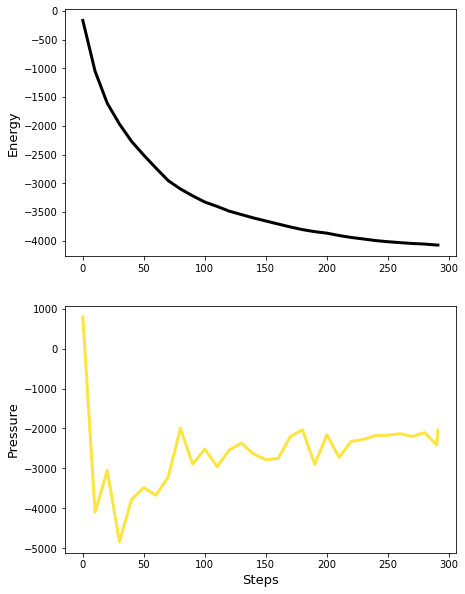

In [29]:
with open('tip4p_minimization.log') as f:
    for l in f:
        if l.startswith('Step'):
            columns = l.split()[1:]
            break
last_index = 0
for i in columns:
    last_index = last_index + 1
    if len(i) != 6:
        break

em_steps = columns[:last_index,0]
em_energy = columns[:last_index,4]
em_pressure = columns[:last_index,5]

fig, axs = plt.subplots(1,figsize=(7,10))

axs[0].plot(em_steps, em_energy, color='black', linewidth=3)

plt.xlabel('Steps', fontsize=13)
axs[0].set_ylabel('Energy', fontsize=13)

plt.show()

### 4) Simulation Settings and Run
Set up the simulation parameters including temperature, pressure, and integration.

Execute simulation.

**Input file (continuation):**

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
#Neighbor settings
neighbor        3.0 bin
neigh_modify    delay 0 every 1 check yes

#2-Step Equilibration
fix             fixwater all shake 0.0001 100 0 b 1 a 1
timestep        1.0
thermo_style    custom step temp press density etotal
thermo          100
variable        step equal step
variable        temp equal temp
variable        press equal press
variable        density equal density
variable        etotal equal etotal
fix             myPrint all print 100 "${step} ${temp} ${press} ${density} ${etotal}" file tip4p_equilibration.txt screen no

#1st Step - NVT simulation to relax to temperature of interest
fix             ensFix all nvt temp ${T_target} ${T_target} 100.0  # NVT equilibration
run             ${nvtSteps} #run simulation

#2nd Step - NPT Simulation to relax to density of interest
unfix           ensFix
fix             ensFix all npt temp ${T_target} ${T_target} 100.0 iso ${P_target} ${P_target} 1000.0 # NPT equilibration
run             ${nptSteps}
</code></pre>
</div>


Explanation:
- neighbor sets the neighbor list skin distance to 2.0 units and uses the binning method for neighbor list construction.
- neigh_modify modifies the neighbor list to be rebuilt every 1 timestep with no delay, and checks if atoms have moved more than half the skin distance since the last rebuild.
- fix shake applies the SHAKE algorithm to all atoms to constrain bond lengths (b) and angles (a) with a relative tolerance of 0.0001 and a maximum of 100 iterations per timestep. Bond type 1 and angle type 1 are constrained.
- timestep 1.0 sets the simulation timestep to 1 fs.
- variable defines a variable named "step" that equals the current step number. Same for the other variables.
- fix myPrint prints the values of the variables step, temp, press, density, and etotal every 100 timesteps to the file "tip4p_equilibration.txt" without printing to the screen.

Equilibration is done in 2 parts:
1) fix ensFix all nvt applies the NVT (constant Number of particles, Volume, and Temperature) ensemble to all atoms, maintaining the temperature at 298.0 K with a damping parameter of 100.0.
- run 50000 runs the simulation for 50,000 timesteps.
- unfix removes the fix with ID ensFix, stopping any actions or constraints it was applying.

2) fix ensFix all npt applies the NPT (constant Number of particles, Pressure, and Temperature) ensemble to all atoms, maintaining the temperature at 298.0 K with a damping parameter of 100.0. The pressure is controlled isotropically to 1.0 atm with a pressure damping parameter of 1000.0.

### 5) Output data

**Input file (continuation):**

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
# Data output for analysis
write_data      tip4p-equil-T${T_target}-P${P_target}.dat
</code></pre>
</div>


Explanation:

- write_data writes the current simulation state (including atom positions, velocities, bonds, etc.) to a file that can be used for restarting simulations or for analysis.

## Running the Simulation in the terminal 

To run the simulation, use the following command in the terminal:

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">

### Step 1:
cp /ocean/projects/see220002p/shared/LAMMPS/Water-Bulk/in.${FF}-prod
cp /ocean/projects/see220002p/shared/LAMMPS/Water-Bulk/${FF}-equil.dat
cp /ocean/projects/see220002p/shared/LAMMPS/Water-Bulk/analysis.cmd

### Step 2:
sbatch analysis.cmd ${FF} ${Temperature} ${Pressure} ${nptSteps}
</code></pre>
</div>


### Check for equilibration

<font color='red'>**To do for students: Check how the thermodynamic properties of the system change as the system is running**</font>

If you check the log.lammps file or the tip4p_equilibration.txt you created, you will find the thermodynamic data throughout the equilibration and it looks like this:

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
   Step          Temp          Press         Density         TotEng    
       291   447.18648      608.63423      0.44318923    -3229.8318    
       300   193.77616      866.31342      0.44318923    -3146.0872    
       400   169.29115     -2512.332       0.44318923    -3070.4794    
       500   188.61554     -1712.9614      0.44318923    -2956.7961    
       600   233.59213     -1132.0368      0.44318923    -2819.4511    
       700   257.35059     -576.70438      0.44318923    -2677.8708    
       800   286.53234     -982.21952      0.44318923    -2550.0337    
       900   307.02164     -747.53046      0.44318923    -2452.4198    
      1000   306.00916     -1010.3351      0.44318923    -2404.0131    
      1100   307.38546     -1040.7029      0.44318923    -2396.443     
      1200   304.22756     -815.07787      0.44318923    -2437.6888    
      1300   297.57033     -990.2651       0.44318923    -2486.6696    
      1400   299.23809     -491.36426      0.44318923    -2519.0434    
      1500   289.75886     -404.63238      0.44318923    -2557.1595    
      1600   285.49464     -716.84131      0.44318923    -2574.6358    
      1700   297.09498     -770.38842      0.44318923    -2561.2119    
      1800   303.31515     -953.24179      0.44318923    -2539.5437    
      1900   299.30562     -462.90257      0.44318923    -2544.3011    
      2000   298.48084     -401.99461      0.44318923    -2576.9047    
      2100   289.00373     -314.27353      0.44318923    -2613.76      
(...)
</code></pre>
</div>


You can plot it to see how the properties are changing:

In [22]:
eq = np.loadtxt('tip4p_equilibration.txt',skiprows=1)
#eq = np.loadtxt('tip4p2005_equilibration.txt',skiprows=1)
#eq = np.loadtxt('tip3p_equilibration.txt',skiprows=1)
#eq = np.loadtxt('spce_equilibration.txt',skiprows=1)
eq_steps = eq[:,0]
#eq_temp = eq[:,1]
eq_pressure = eq[:,2]
eq_density = eq[:,3]
eq_energy = eq[:,4]

print("average E:", np.average(eq_energy[600:]))
print("average P:", np.average(eq_pressure[600:]))
print("average T:", np.average(eq_temp[600:]))
print("average Density:", np.average(eq_density[600:]))

fig, axs = plt.subplots(4,1,figsize=(7,10))

axs[0].plot(eq_steps[:500], eq_energy[:500], label='NVT', color='#FEE440', linewidth=3)  # NVT
axs[0].plot(eq_steps[500:], eq_energy[500:], label='NPT', color='black', linewidth=3)  # NPT
axs[0].legend(loc='lower right')
axs[1].plot(eq_steps[:500], eq_pressure[:500], label='NVT', color='#C287E8', linewidth=3)  # NVT
axs[1].plot(eq_steps[500:], eq_pressure[500:], label='NPT', color='#BCF4F5', linewidth=3)  # NPT
axs[1].legend(loc='lower right')
#axs[2].plot(eq_steps[:500], eq_temp[:500], label='NVT', color='#A2D729', linewidth=3)  # NVT
#axs[2].plot(eq_steps[500:], eq_temp[500:], label='NPT', color='#FE5F55', linewidth=3)  # NPT
#axs[2].legend(loc='lower right')
axs[3].plot(eq_steps[:500], eq_density[:500], label='NVT', color='#3C91E6', linewidth=3)  # NVT
axs[3].plot(eq_steps[500:], eq_density[500:], label='NPT', color='#7BE0AD', linewidth=3)  # NPT
axs[3].legend(loc='lower right') 

plt.xlabel('Steps', fontsize=13)
axs[0].set_ylabel('Energy', fontsize=13)
axs[1].set_ylabel('Pressure', fontsize=13)
#axs[2].set_ylabel('Temperature', fontsize=13)
axs[3].set_ylabel('Density', fontsize=13)

plt.show()

FileNotFoundError: tip4p_equilibration.txt not found.

## Run production

After equilibrating your system, you can start running **production**. During production you can extract data to analyze. 

Depending on your system equilibration can take a long time. Here we provide you with already equilibrated data files for you to start production.

**Input file (in.tip4p-prod):**

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
#Initialization (same as before)
units           real
atom_style      full
dimension       3
boundary        p p p

#Define interaction styles (must be consistent with initial setup)
pair_style lj/cut/coul/long 8.5
pair_coeff      1 1 0.1521 3.1507
pair_coeff      2 2 0.0 1.0
pair_coeff      1 2 0.0 1.0
bond_style      harmonic
bond_coeff      1 450 0.9572
angle_style     harmonic
angle_coeff     1 55 104.52

#Read data file
read_data       tip4p-equil-T${T_target}-P${P_target}.dat

#Long-range electrostatics (same as before)
kspace_style    pppm 1.0e-4

#Neighbor settings (same as before)
neighbor        3.0 bin
neigh_modify    delay 0 every 1 check yes

#Production run - NPT simulation
fix             fixwater all shake 0.0001 100 0 b 1 a 1 # Freeze bonds & angles
timestep        2.0                     # increase timestep for production
thermo          100                     # Output frequency.
thermo_style    custom step temp press density etotal
fix             ensFix all npt temp ${T_target} ${T_target} 200.0 iso ${P_target} ${P_target} 2000.0
compute         molChunk all chunk/atom molecule
compute         dipoleCmpt all dipole/tip4p/chunk molChunk
compute         rdfOO all rdf 400 1 1 cutoff 8.5
variable        myPE equal pe
variable        myPressure equal press
variable        myDen equal density
variable        myEnthalpy equal enthalpy
fix             thermoFix all ave/time 20 1 20 v_myPE v_myPressure v_myDen v_myEnthalpy ave running file tip4p-T${T_target}-P${P_target}.thermo.txt
fix             rdfAvgFix all ave/time 20 1 20 c_rdfOO[*] ave running file tip4p-T${T_target}-P${P_target}.rdf overwrite  mode vector
dump            dumpDipole all custom 500 tip4p-T${T_target}-P${P_target}-dump.xyz id type x y z
fix             dpl all ave/time 500 1 500 c_dipoleCmpt[*] file tip4p-T${T_target}-P${P_target}.dipole.out mode vector
variable        myStep equal step
fix             printFix all print 20 "${myStep} ${myPE} ${myPressure} ${myDen} ${myEnthalpy}" file tip4p-T${T_target}-P${P_target}.instVal.txt

#Data output for analysis
run             ${nSteps}
write_data      tip4p-T${T_target}-P${P_target}.dat

</code></pre>
</div>


Explanation:
- read_data reads the initial simulation state (including atom positions, velocities, bonds, etc.) from a file that was typically generated by a previous write_data command.
- restart writes restart files every N timesteps. These files can be used to restart the simulation from the exact state at the time they were written.

### Check the production data

<font color='red'>**To do for students: Check how the thermodynamic properties of the system change as the system is running**</font>

If you check the tip4p_production.txt file we created, you will find the thermodynamic data throughout production and it looks like this:

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
# Fix print output for fix myPrint
0 291.635814597356 -68.9731066466939 0.980392969114805 -3228.27301892738
100 283.273925904653 699.652354456346 0.980492419217107 -3221.36044568732
200 303.641505158921 657.977963104009 0.978739474852137 -3190.95617257546
300 318.356760949328 -137.226284377183 0.972322955113953 -3153.04900158304
400 298.126954037634 41.8584584136467 0.964377598744538 -3135.37701387058
500 290.809807033777 -67.8418102551999 0.957601762311447 -3162.77766035285
600 294.913343109898 -171.116749279082 0.954703880878564 -3214.68413354145
700 289.043052817161 -403.8501112378 0.955605228618037 -3225.1159475992
800 289.448294439513 -870.982706001238 0.959313913735952 -3201.91306690727
900 302.152483163161 573.119596021064 0.965140311098262 -3170.00081050054
1000 298.378342185809 565.187837066729 0.968854252489188 -3178.39085899527
1100 294.100658553558 43.7722885660176 0.970118014802824 -3196.96272750557
1200 306.051810597278 -338.633809756548 0.971960784011365 -3212.40184070515
1300 293.783261098188 -201.912661267861 0.974194751478984 -3205.00173537929
1400 304.233836847145 137.655909079445 0.979048492534425 -3190.36333032326
1500 298.754948168489 499.081990914976 0.982397479316799 -3196.45474107728
1600 299.883128545776 626.221770713115 0.982564209900345 -3202.79819406981
</code></pre>
</div>

You can plot it to see how the properties are changing:

average PE: -3908.456262341186
average Pressure: 0.7297399821570805
average Density: 0.9759372835755751
average Enthalpy: -3194.827734803386


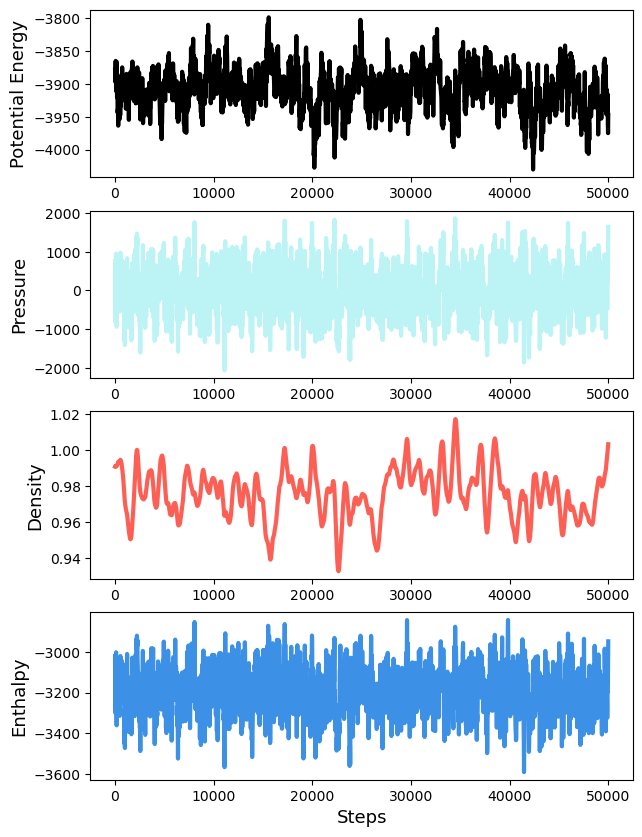

In [26]:
prod = np.loadtxt('tip4p-T300-P1.instVal.txt',skiprows=1)
#prod = np.loadtxt('tip4p2005-T300-P1.instVal.txt',skiprows=1)
#prod = np.loadtxt('tip3p-T300-P1.instVal.txt',skiprows=1)
#prod = np.loadtxt('spce-T300-P1.instVal.txt',skiprows=1)
prod_steps = prod[:,0]
prod_potential = prod[:,1]
prod_pressure = prod[:,2]
prod_density = prod[:,3]
prod_enthalpy = prod[:,4]

print("average PE:", np.average(prod_potential))
print("average Pressure:", np.average(prod_pressure))
print("average Density:", np.average(prod_density))
print("average Enthalpy:", np.average(prod_enthalpy))

fig, axs = plt.subplots(4,1,figsize=(7,10))

axs[0].plot(prod_steps, prod_potential, color='black', linewidth=3) 
axs[1].plot(prod_steps, prod_pressure, color='#BCF4F5', linewidth=3)
axs[2].plot(prod_steps, prod_density, color='#FE5F55', linewidth=3) 
axs[3].plot(prod_steps, prod_enthalpy, color='#3C91E6', linewidth=3)  

plt.xlabel('Steps', fontsize=13)
axs[0].set_ylabel('Potential Energy', fontsize=13)
axs[1].set_ylabel('Pressure', fontsize=13)
axs[2].set_ylabel('Density', fontsize=13)
axs[3].set_ylabel('Enthalpy', fontsize=13)

plt.show()

Let's compare the density between the water models:

average Density (TIP4P): 0.9767415773690523


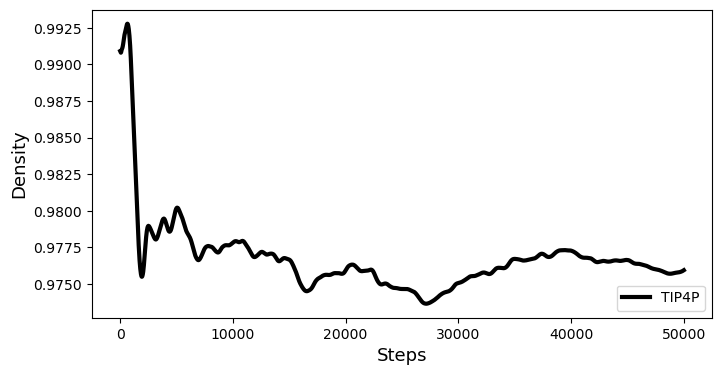

In [28]:
prod1 = np.loadtxt('tip4p-T300-P1.thermo.txt',skiprows=1)
#prod2 = np.loadtxt('tip4p2005-T300-P1.thermo.txt',skiprows=1)
#prod3 = np.loadtxt('tip3p-T300-P1.thermo.txt',skiprows=1)
#prod4 = np.loadtxt('spce-T300-P1.thermo.txt',skiprows=1)
prod_steps1 = prod1[:,0]
prod_density1 = prod1[:,3]
#prod_density2 = prod2[:,3]
#prod_density3 = prod3[:,3]
#prod_density4 = prod4[:,3]

print("average Density (TIP4P):", np.average(prod_density1))
#print("average Density (TIP4P/2005):", np.average(prod_density2))
#print("average Density (TIP3P):", np.average(prod_density3))
#print("average Density (SPC/E):", np.average(prod_density4))

plt.figure(figsize=(8,4))

plt.plot(prod_steps1, prod_density1, label = 'TIP4P', color='black', linewidth=3)
#plt.plot(prod_steps1, prod_density2, label = 'TIP4P/2005', color='#BCF4F5', linewidth=3)
#plt.plot(prod_steps1, prod_density3, label = 'TIP3P', color='#FE5F55', linewidth=3)
#plt.plot(prod_steps1, prod_density4, label = 'SPC/E', color='#3C91E6', linewidth=3)

plt.xlabel('Steps', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.legend(loc='lower right')

plt.show()

Plotting the running averages is better than the instantaneous data (density) as it shows clearly that the equilibrium has not reached yet.

### Calculate properties in real-time using LAMMPS

**Input file (in.tip4p-prod continuation):**

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
compute         molChunk all chunk/atom molecule
compute         dipoleCmpt all dipole/tip4p/chunk molChunk
compute         rdfOO all rdf 400 1 1 cutoff 8.5
variable        myPE equal pe
variable        myPressure equal press
variable        myDen equal density
variable        myEnthalpy equal enthalpy
fix             thermoFix all ave/time 20 1 20 v_myPE v_myPressure v_myDen v_myEnthalpy ave running file tip4p-T${T_target}-P${P_target}.thermo.txt
fix             rdfAvgFix all ave/time 20 1 20 c_rdfOO[*] ave running file tip4p-T${T_target}-P${P_target}.rdf overwrite  mode vector
dump            dumpDipole all custom 500 tip4p-T${T_target}-P${P_target}-dump.xyz id type x y z
fix             dpl all ave/time 500 1 500 c_dipoleCmpt[*] file tip4p-T${T_target}-P${P_target}.dipole.out mode vector
variable        myStep equal step
fix             printFix all print 20 "${myStep} ${myPE} ${myPressure} ${myDen} ${myEnthalpy}" file tip4p-T${T_target}-P${P_target}.instVal.txt
run             ${nSteps}
</code></pre>
</div>


Let's break this down:

#### RDF

The lines that we will be using to calculate RDF in real time using LAMMPS are:

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
compute         rdfOO all rdf 400 1 1 cutoff 10.0
fix             rdfAvgFix all ave/time 20 1 20 c_rdfOO[*] ave running file tip4p.rdf overwrite  mode vector
</code></pre>
</div>


Explanation:
- compute rdfOO all rdf 400 1 1 cutoff 10.0: Computes the radial distribution function (RDF) for atom type 1 with itself (oxygen-oxygen in water) using 400 bins and a cutoff distance of 10.0 units.
- fix rdfAvgFix all ave/time 20 1 20 c_rdfOO[*] ave running file tip4p.rdf overwrite mode vector: Averages the RDF values computed by rdfOO over 20 timesteps, every timestep, and outputs the running average to the file "tip4p.rdf", overwriting the file each time.

#### RDF calculation using the files we created


Text file columns:
1. Bin number: The first column, which is the index of the distance bin.
2. Distance (r): The second column, which represents the center of the distance bin.
3. g(r): The third column, which is the radial distribution function value for the distance bin.
4. Coordination number: The fourth column, which represents the cumulative number of atoms within the given distance.

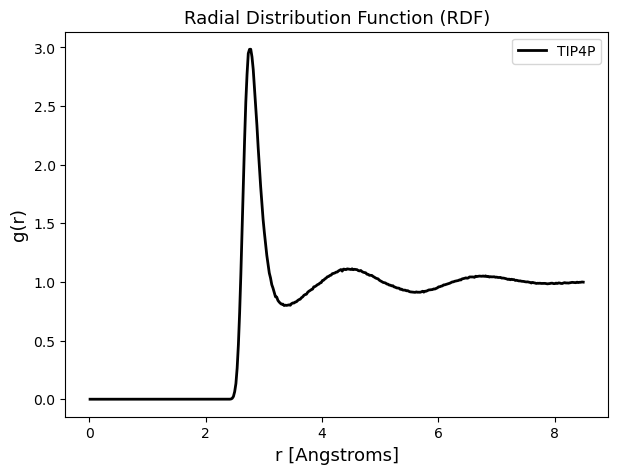

In [29]:
rdf_t4p = np.loadtxt('tip4p-T300-P1.rdf',skiprows=4)
#rdf_t4p5 = np.loadtxt('tip4p2005-T300-P1.rdf',skiprows=4)
#rdf_t3p = np.loadtxt('tip3p-T300-P1.rdf',skiprows=4)
#rdf_spce = np.loadtxt('spce-T300-P1.rdf',skiprows=4)

plt.figure(figsize=(7,5))

plt.plot(rdf_t4p[:,1], rdf_t4p[:,2], label = 'TIP4P', color='black', linewidth=2) 
#plt.plot(rdf_t4p5[:,1], rdf_t4p5[:,2], label = 'TIP4P/2005', color='#BCF4F5', linewidth=2) 
#plt.plot(rdf_t3p[:,1], rdf_t3p[:,2], label = 'TIP3P', color='#FE5F55', linewidth=2) 
#plt.plot(rdf_spce[:,1], rdf_spce[:,2], label = 'SPC/E', color='#3C91E6', linewidth=2) 

plt.xlabel('r [Angstroms]', fontsize=13)
plt.ylabel('g(r)', fontsize=13)
plt.title('Radial Distribution Function (RDF)', fontsize=13)
plt.legend(loc='upper right')

plt.show()

#### Output running averages

The lines that we will be using to calculate running averages of density, pressure and potential energy are:

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
variable        myPE equal pe
variable        myPressure equal press
variable        myDen equal density
fix             thermoFix all ave/time 20 1 20 v_myPE v_myPressure v_myDen ave running file tip4p.thermo.txt
</code></pre>
</div>


Explanation:
- variable defines a variable named "myPE" that equals the potential energy. Same for the other 2 quantities.
- fix thermoFix all ave/time 20 1 20 v_myPE v_myPressure v_myDen ave running file tip4p.thermo.txt: Averages the values of myPE, myPressure, and myDen over 20 timesteps, every timestep, and outputs the running average to the file "tip4p.thermo.txt".

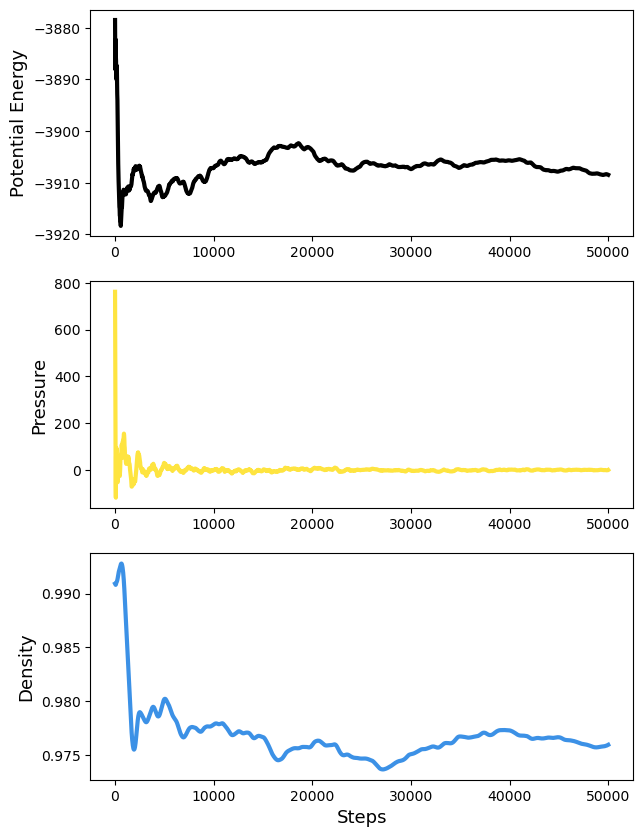

In [30]:
thermo = np.loadtxt('tip4p-T300-P1.thermo.txt',skiprows=2)
timesteps = thermo[:,0]
ave_PE = thermo[:,1]
ave_P = thermo[:,2]
ave_density = thermo[:,3]

fig, axs = plt.subplots(3,1,figsize=(7,10))

axs[0].plot(timesteps, ave_PE, color='black', linewidth=3) 
axs[1].plot(timesteps, ave_P, color='#FEE440', linewidth=3)
axs[2].plot(timesteps, ave_density, color='#3C91E6', linewidth=3) 

plt.xlabel('Steps', fontsize=13)
axs[0].set_ylabel('Potential Energy', fontsize=13)
axs[1].set_ylabel('Pressure', fontsize=13)
axs[2].set_ylabel('Density', fontsize=13)

plt.show()

Let's compare the density between the water models:

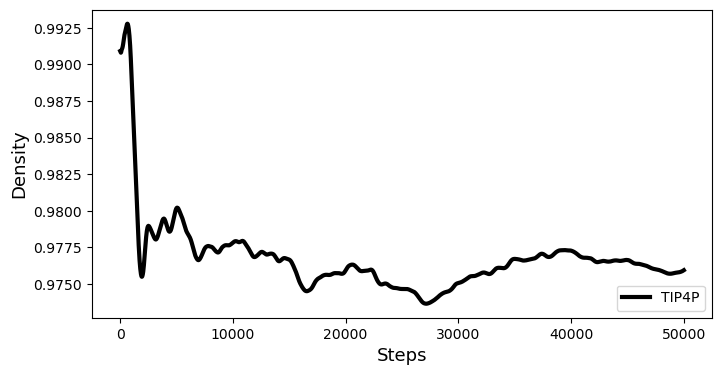

In [33]:
thermo_t4p = np.loadtxt('tip4p-T300-P1.thermo.txt',skiprows=2)
#thermo_t4p5 = np.loadtxt('tip4p2005-T300-P1.thermo.txt',skiprows=2)
#thermo_t3p = np.loadtxt('tip3p-T300-P1.thermo.txt',skiprows=2)
#thermo_spce = np.loadtxt('spce-T300-P1.thermo.txt',skiprows=2)
timesteps = thermo_t4p[:,0]
avd_t4p = thermo_t4p[:,3]
#avd_t4p5 = thermo_t4p5[:,3]
#avd_t3p = thermo_t3p[:,3]
#avd_spce = thermo_spce[:,3]


plt.figure(figsize=(8,4))

plt.plot(timesteps, avd_t4p, label = 'TIP4P', color='black', linewidth=3)
#plt.plot(timesteps, avd_t4p5, label = 'TIP4P/2005', color='#BCF4F5', linewidth=3)
#plt.plot(timesteps, avd_t3p, label = 'TIP3P', color='#FE5F55', linewidth=3)
#plt.plot(timesteps, avd_spce, label = 'SPC/E', color='#3C91E6', linewidth=3)

plt.xlabel('Steps', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.legend(loc='lower right')

plt.show()

#### Dipole vectors

The lines that we will be using to calculate the dipole vectors of each molecule at each frame:

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
compute         molChunk all chunk/atom molecule
compute         dipoleCmpt all dipole/chunk molChunk
fix             dpl all ave/time 500 1 500 c_dipoleCmpt[*] file tip4p-prod-dipole.out mode vector
</code></pre>
</div>


Explanation:
- compute molChunk all chunk/atom molecule: Defines a compute that creates chunks of atoms based on their molecule ID.
- compute dipoleCmpt all dipole/chunk molChunk: Computes the dipole moment for each chunk defined by molChunk.
- fix dpl all ave/time 500 1 500 c_dipoleCmpt[*] file tip4p-prod-dipole.out mode vector: Averages the dipole moment computed by dipoleCmpt over 500 timesteps, every timestep, and outputs the values to the file "tip4p-prod-dipole.out".

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

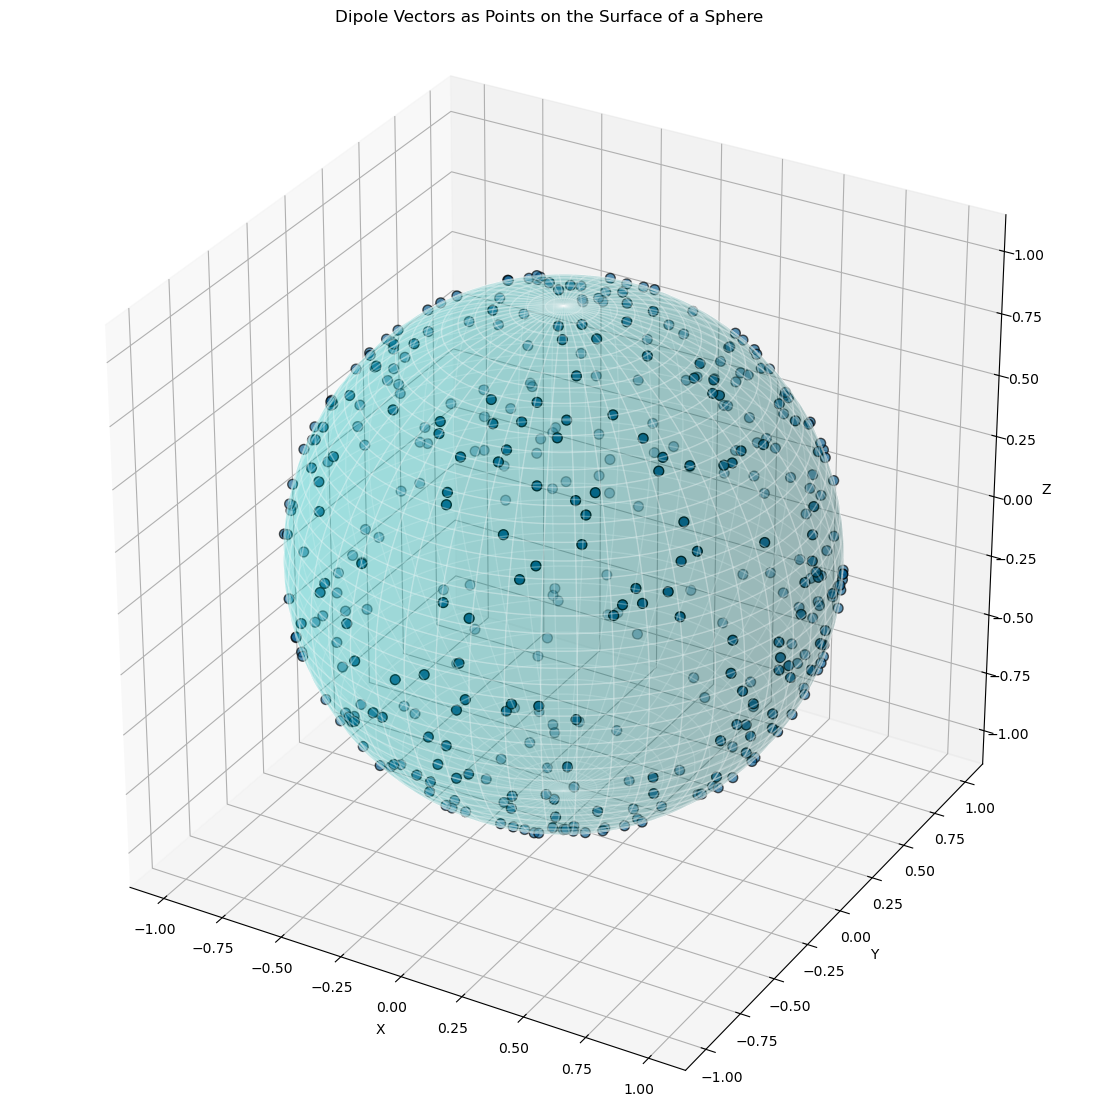

In [53]:
f = open('tip4p-T300-P1.dipole.out')
data_str = f.readlines()[3:]
f.close()

nMolecule = 400
nTimestamp = int(len(data_str)/(nMolecule + 1))

dipoleVectors = []
normVec = []
for i in data_str:
    parts = i.split()
    if len(parts) == 5:  # Check if there are exactly 5 columns
        index = int(parts[0])  # molecule index (can be ignored for now)
        x = float(parts[1])
        y = float(parts[2])
        z = float(parts[3])
        magnitude = float(parts[4])
        dipoleVectors.append([x, y, z, magnitude])
        normVec.append([x/magnitude, y/magnitude, z/magnitude])

# Convert to a NumPy array for easier processing
dipoleVectors = np.array(dipoleVectors)
normVec = np.array(normVec)

# Create a 3D plot for visualization
mm = 1/25.4  # millimeters in inches
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface of the sphere
u = np.linspace(0, 2 * np.pi, 1000)
v = np.linspace(0, np.pi, 1000)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, color='c', alpha=0.2,  edgecolor='w') 

# Plot the normalized vectors as points on the sphere's surface
# for a single frame
ax.scatter(normVec[-400:, 0], normVec[-400:, 1], normVec[-400:, 2], color='#045a8d', s=50, edgecolor = 'k')
# for a full trajectory
#ax.scatter(normVec[:, 0], normVec[:, 1], normVec[:, 2], color='#045a8d', s=0.5, edgecolor = 'k')

# Set labels and aspect ratio
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Dipole Vectors as Points on the Surface of a Sphere')
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio

plt.show()  

#### Dump files for further analysis


The lines that we will be using to dump id type x y z to be used for further analysis (see below):

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
dump            dumpDipole all custom 500 tip4p-prod-dump.xyz id type x y z
</code></pre>
</div>


Explanation:
- dump dumpDipole all custom 500 tip4p-prod-dump.xyz id type x y z: Dumps atom information (id, type, x, y, z positions) to the file "tip4p-prod-dump.xyz" every 500 timesteps.

# Visualization
Use visualization tools like VMD or OVITO to visualize the output dump files, data files, or restart files that you saved at any point.

This how a data file of the system in OVITO looks like:

![Sample Image](Tip4p_aftereq.png)

# Post-analysis (jupyter notebook - python):

Calculate properties, such as water density, dipole distributions, how average angle changes, RDF

## Set up MDAnalysis

1. Install MDAnalysis

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">
pip install MDAnalysis
pip install MDAnalysisTests
</code></pre>
</div>


In [48]:
#pip install MDAnalysis
#pip install MDAnalysisTests

2. Prepare the Environment:

- LAMMPS dump files usually contain atomic coordinates. MDAnalysis can read these directly.
- LAMMPS data files contain topology information that might be needed to properly interpret the dump files.

## Calculate properties using MD Aanalysis
### Calculate water density

In [51]:
import MDAnalysis as mda
from MDAnalysis.analysis import density
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.transformations import nojump
from MDAnalysis.analysis.rdf import InterRDF

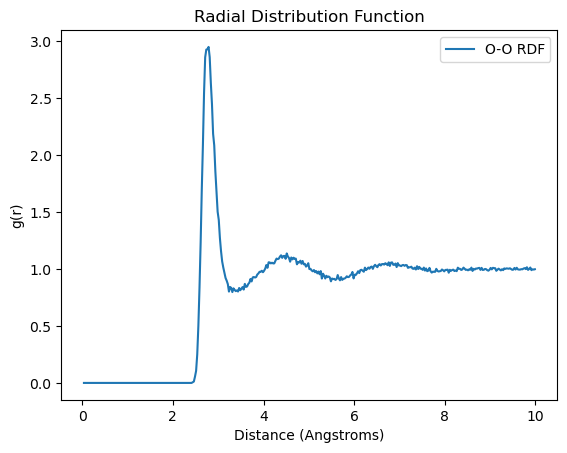

In [52]:
# Load the LAMMPS dump file with the correct timestep
u = mda.Universe("tip4p-T300-P1-dump.xyz", format="LAMMPSDUMP", dt=2.0)

#unwrap coordinates
transformation = nojump.NoJump()
u.trajectory.add_transformations(transformation)

# Select oxygen and hydrogen atoms
oxygens = u.select_atoms("type 1")
hydrogens = u.select_atoms("type 2")

# Calculate the RDF between oxygen atoms (O-O RDF)
rdf_oo = InterRDF(oxygens, oxygens, nbins=400, range=(0.0, 10.0))
rdf_oo.run()

# Plot the RDFs
plt.figure()
plt.plot(rdf_oo.results.bins[1:], rdf_oo.results.rdf[1:], label='O-O RDF')
plt.xlabel('Distance (Angstroms)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function')
plt.legend()
plt.show()